# Imports

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Dataset

In [2]:
main_df = pd.read_csv('customer.csv')
main_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# K-Means

### Data

In [3]:
km_df = main_df

### Draws

Text(0, 0.5, 'Annual Income (k$)')

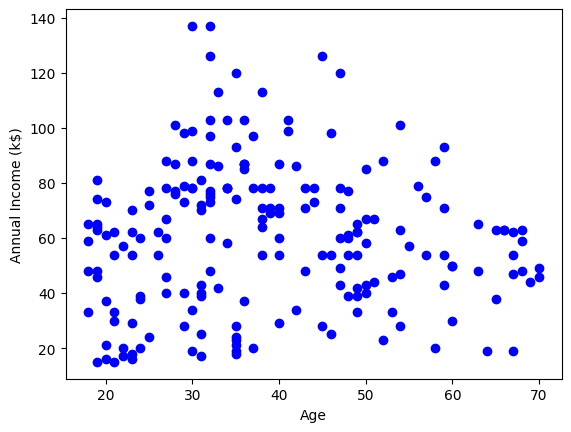

In [4]:
plt.scatter(km_df['Age'],km_df['Annual Income (k$)'], color='blue')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

Text(0, 0.5, 'Spending Score (1-100)')

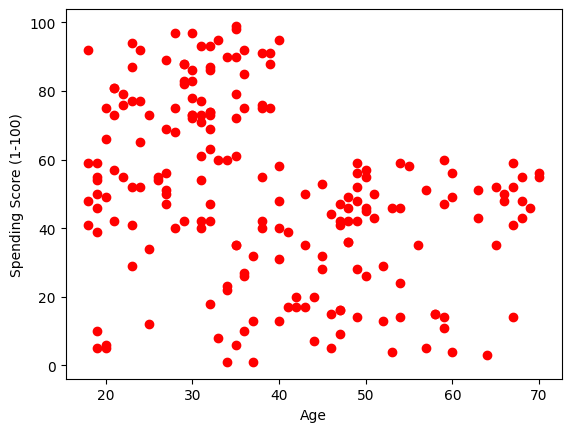

In [5]:
plt.scatter(km_df['Age'],km_df['Spending Score (1-100)'], color='red')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

Text(0, 0.5, 'Annual Income (k$)')

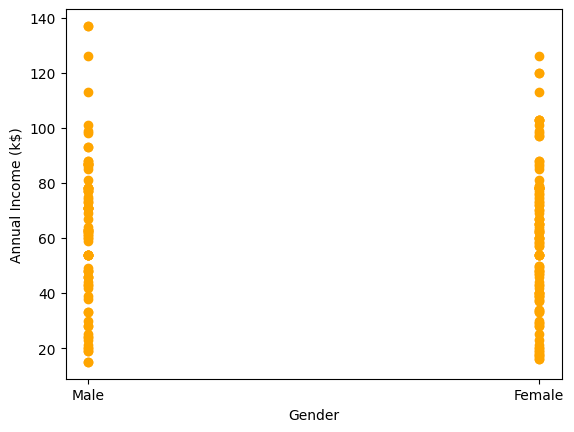

In [7]:
plt.scatter(km_df['Gender'],km_df['Annual Income (k$)'], color='orange')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')

### Pre-Process

In [6]:
km_df['Gender_num'] = km_df['Gender'].replace({'Male':0,'Female':1})
km_df.head()

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_16876\1075065929.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  km_df['Gender_num'] = km_df['Gender'].replace({'Male':0,'Female':1})


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_num
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [8]:
numeric_km_df = km_df.drop(['CustomerID', 'Gender'], axis=1)
numeric_km_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_num']].apply(pd.to_numeric, errors='coerce')
numeric_km_df = numeric_km_df.dropna()
numeric_km_df = numeric_km_df.reset_index()
numeric_km_df = numeric_km_df.astype('float64')
print(numeric_km_df.dtypes)
print(numeric_km_df.shape)

index                     float64
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)    float64
Gender_num                float64
dtype: object
(200, 5)


In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
x = numeric_km_df.values
norm_x = MinMaxScaler().fit_transform(x)
norm_x[0:5]

array([[0.        , 0.01923077, 0.        , 0.3877551 , 0.        ],
       [0.00502513, 0.05769231, 0.        , 0.81632653, 0.        ],
       [0.01005025, 0.03846154, 0.00819672, 0.05102041, 1.        ],
       [0.01507538, 0.09615385, 0.00819672, 0.7755102 , 1.        ],
       [0.0201005 , 0.25      , 0.01639344, 0.39795918, 1.        ]])

### Modelling (K-Means)

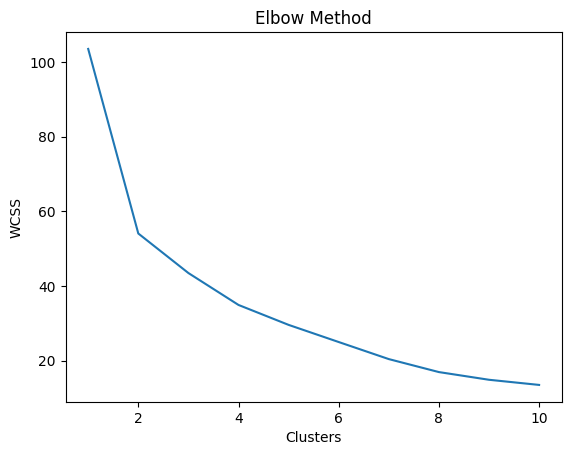

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_num,Cluster_Code
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,3


In [23]:
from sklearn.cluster import KMeans 

wcss = []
for cluster in range(1, 11):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(norm_x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()


km_df.head()

In [37]:
from sklearn.metrics import silhouette_score

optimal_k = 10

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(norm_x)
labels = kmeans.labels_
silhouette_avg = silhouette_score(norm_x, labels)
print(f"Silhouette Score for {optimal_k} = {silhouette_avg}")


Silhouette Score for 10 = 0.4213418319730954


In [38]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(norm_x, labels)
print(f"DB Index: {db_score}")


DB Index: 0.7926543972871609


<Axes: >

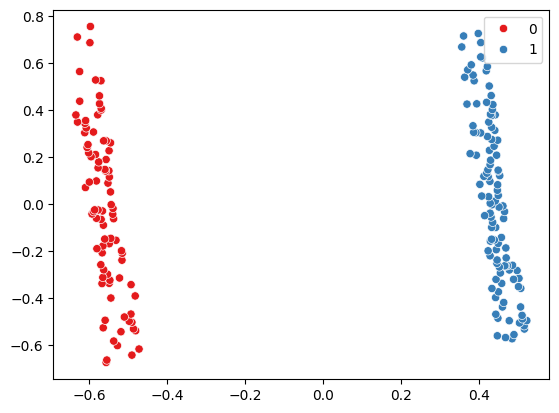

In [21]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_data = pca.fit_transform(norm_x)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette="Set1")

# IT IS SHIT!